<a href="https://colab.research.google.com/github/blancosss21/F1-Driver-Performance-Analysis/blob/main/f1_driver_performance_complete_analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F1 Driver Performance 2020-2023 - Analysis

## Overview

This project involves the preparation and analysis of Formula 1 race data obtained from the Ergast API. The primary objective is to clean, transform, and visualize the race data from multiple seasons to derive insights into driver performance.

## Contents

- **Data Fetching and Preparation**: Scripts to download and prepare race data from the Ergast API.
- **Data Cleaning and Transformation**: Processes to clean the data, handle missing values, and transform it into a suitable format for analysis.
- **Exploratory Data Analysis (EDA)**: Techniques to explore the data through descriptive statistics and visualizations to identify patterns and trends.
- **Visualization of Driver Statistics**: Graphs and charts to visually represent driver performances, average positions, and consistency.

## Features

- Fetches race results and driver information from the Ergast API.
- Computes average positions for each driver based on race results.
- Ranks drivers based on performance metrics.
- Generates visualizations including bar charts and radar charts to compare driver performances over the seasons.

## Requirements

To run this project, you'll need to install the following Python packages:

- `pandas`: For data manipulation and analysis.
- `numpy`: For numerical computations.
- `matplotlib`: For creating static, animated, and interactive visualizations.
- `seaborn`: For statistical data visualization.
- `requests`: For making HTTP requests to fetch data from the Ergast API.
- `json`: For parsing JSON data.

You can install these packages using pip:

```bash
pip install pandas numpy matplotlib seaborn requests
```

This project is licensed under the MIT License - see the LICENSE file for details.


# Comprehensive Data Preparation

**Importing Libraries:**
- Imported necessary packages for data manipulation and visualization: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `requests`, and `json`.

**Defining a Function to Get Race Data:**
- Created a function `get_race_data(season)` that fetches race data for a given season from the Ergast API.
- The function constructs the API URL, sends a GET request, and returns the race data in JSON format.

**Fetching Data for Multiple Seasons:**
- Initialized an empty list `all_races`.
- Used a loop to fetch race data for each season in the list `seasons` and appended the results to `all_races`.

**Converting Data to DataFrame:**
- Converted the collected race data (`all_races`) into a pandas DataFrame using `pd.json_normalize`.
- Displayed the DataFrame columns to verify the data structure.

**Selecting and Renaming Columns:**
- Selected columns of interest: `driverId`, `position`, `points`, `fastestLapTime`, `fastestLapRank`, `averageSpeed`, `totalTimeMillis`, `totalTime`, `season`, `raceName`, `date`, `circuitName`.
- Renamed columns for better readability.

**Data Type Conversion:**
- Converted appropriate columns to numerical and datetime types using `pd.to_numeric`, `pd.to_timedelta`, and `pd.to_datetime`.
- Specifically converted position, points, average speed, total time in milliseconds, and total time to their respective numeric types.
- Converted fastest lap time and total time to total seconds.
- Converted race date to datetime format.

**Displaying the Clean DataFrame:**
- Printed the first few rows of the cleaned DataFrame to ensure the data is properly formatted and ready for analysis.


In [ ]:
# Import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [ ]:
# Obtain race data from the Ergast API
def get_race_data(season):
    url = f"https://ergast.com/api/f1/{season}/results.json?limit=1000"
    response = requests.get(url)
    data = response.json()
    races = data['MRData']['RaceTable']['Races']
    return races

In [ ]:
seasons = [2020, 2021, 2022, 2023, 2024]

# Obtaining data for each season
all_races = []
for season in seasons:
    races = get_race_data(season)
    all_races.extend(races)

# Convert data into a pandas DataFrame
df = pd.json_normalize(all_races, 'Results',
                       ['season', 'round', 'raceName', 'date', ['Circuit', 'circuitName']],
                       record_prefix='_')

# Display available columns to verify the data
print(df.columns)

# Select only columns of interest
df = df[['_Driver.driverId', '_position', '_points', '_FastestLap.Time.time', '_FastestLap.rank', '_FastestLap.AverageSpeed.speed', '_Time.millis', '_Time.time', 'season', 'raceName', 'date', 'Circuit.circuitName']]

# Rename columns for better readability
df.columns = ['driverId', 'position', 'points', 'fastestLapTime', 'fastestLapRank', 'averageSpeed', 'totalTimeMillis', 'totalTime', 'season', 'raceName', 'date', 'circuitName']

# Convert columns to appropriate data types
df['position'] = pd.to_numeric(df['position'], errors='coerce')
df['points'] = pd.to_numeric(df['points'], errors='coerce')
df['fastestLapTime'] = pd.to_timedelta(df['fastestLapTime'], errors='coerce').dt.total_seconds()
df['averageSpeed'] = pd.to_numeric(df['averageSpeed'], errors='coerce')
df['totalTimeMillis'] = pd.to_numeric(df['totalTimeMillis'], errors='coerce')
df['totalTime'] = pd.to_timedelta(df['totalTime'], errors='coerce').dt.total_seconds()
df['date'] = pd.to_datetime(df['date'])

# Show the first rows of the clean DataFrame
print(df.head())

Index(['_number', '_position', '_positionText', '_points', '_grid', '_laps',
       '_status', '_Driver.driverId', '_Driver.permanentNumber',
       '_Driver.code', '_Driver.url', '_Driver.givenName',
       '_Driver.familyName', '_Driver.dateOfBirth', '_Driver.nationality',
       '_Constructor.constructorId', '_Constructor.url', '_Constructor.name',
       '_Constructor.nationality', '_Time.millis', '_Time.time',
       '_FastestLap.rank', '_FastestLap.lap', '_FastestLap.Time.time',
       '_FastestLap.AverageSpeed.units', '_FastestLap.AverageSpeed.speed',
       'season', 'round', 'raceName', 'date', 'Circuit.circuitName'],
      dtype='object')
   driverId  position  points  fastestLapTime fastestLapRank  averageSpeed  \
0    bottas         1      25             NaN              2       229.758   
1   leclerc         2      18             NaN              4       228.933   
2    norris         3      16             NaN              1       230.378   
3  hamilton         4      12  

<ipython-input-4-973494e19c04>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'] = pd.to_numeric(df['position'], errors='coerce')
<ipython-input-4-973494e19c04>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['points'] = pd.to_numeric(df['points'], errors='coerce')
<ipython-input-4-973494e19c04>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

#Displaying the Average Points per Race per Driver

**Calculating Total Points:**
- Calculated the total points for each driver by grouping the DataFrame by `driverId` and summing the `points`.
- Renamed the columns to `driverId` and `total_points`.

**Counting Races:**
- Counted the number of races for each driver by grouping the DataFrame by `driverId` and counting the occurrences.
- Renamed the resulting column to `race_count`.

**Merging Data:**
- Merged the total points and race count DataFrames on `driverId`.

**Calculating Average Points per Race:**
- Calculated the average points per race for each driver by dividing the `total_points` by the `race_count`.

**Visualizing Data:**
- Created a bar plot to display the average points per race for each driver.
- Set the plot size, titles, and labels for better readability.


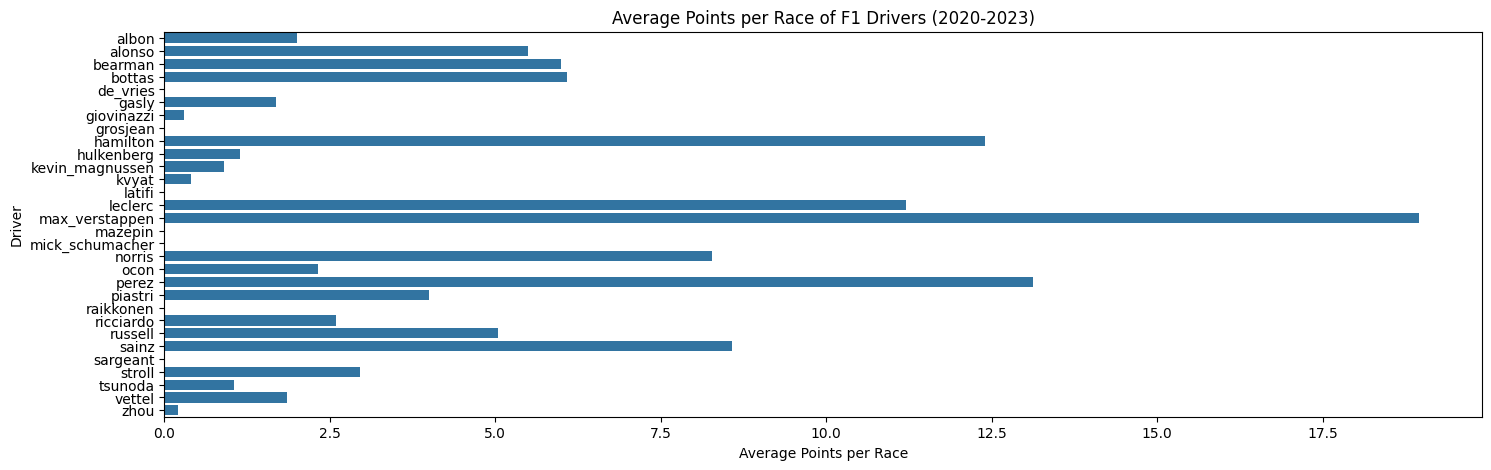

In [ ]:
# Calculate the total points for each driver
driver_points = df.groupby('driverId')['points'].sum().reset_index()
driver_points.columns = ['driverId', 'total_points']

# Count the number of races for each driver
driver_races = df.groupby('driverId').size().reset_index(name='race_count')

# Merge the total points and race count
driver_stats = pd.merge(driver_points, driver_races, on='driverId', how='left')

# Calculate the average points per race
driver_stats['average_points'] = driver_stats['total_points'] / driver_stats['race_count']

# Displaying the Average Points per Race per Driver
plt.figure(figsize=(17, 5))
sns.barplot(x='average_points', y='driverId', data=driver_stats, dodge=False)
plt.title('Average Points per Race of F1 Drivers (2020-2023)')
plt.xlabel('Average Points per Race')
plt.ylabel('Driver')
plt.show()


# Total Points per Driver

**Counting Fastest Laps:**
- Counted the number of fastest laps (rank 1) for each driver by filtering the DataFrame and grouping by `driverId`.
- Renamed the resulting column to `fastest_laps`.

**Merging Data:**
- Merged the `fastest_laps` DataFrame with the existing `driver_stats` DataFrame.
- Filled NaN values with 0 for drivers without fastest laps.

**Visualizing Fastest Laps:**
- Created a bar plot to display the number of fastest laps for each driver who recorded at least one fastest lap.
- Added a conditional check to visualize total points if no drivers have recorded fastest laps.
- Set plot size, titles, and labels for better readability.


Empty DataFrame
Columns: [driverId, fastest_laps]
Index: []
   driverId  total_points  race_count  average_points  fastest_laps
0     albon            40          20            2.00           0.0
1    alonso           110          20            5.50           0.0
2   bearman             6           1            6.00           0.0
3    bottas           152          25            6.08           0.0
4  de_vries             0           5            0.00           0.0


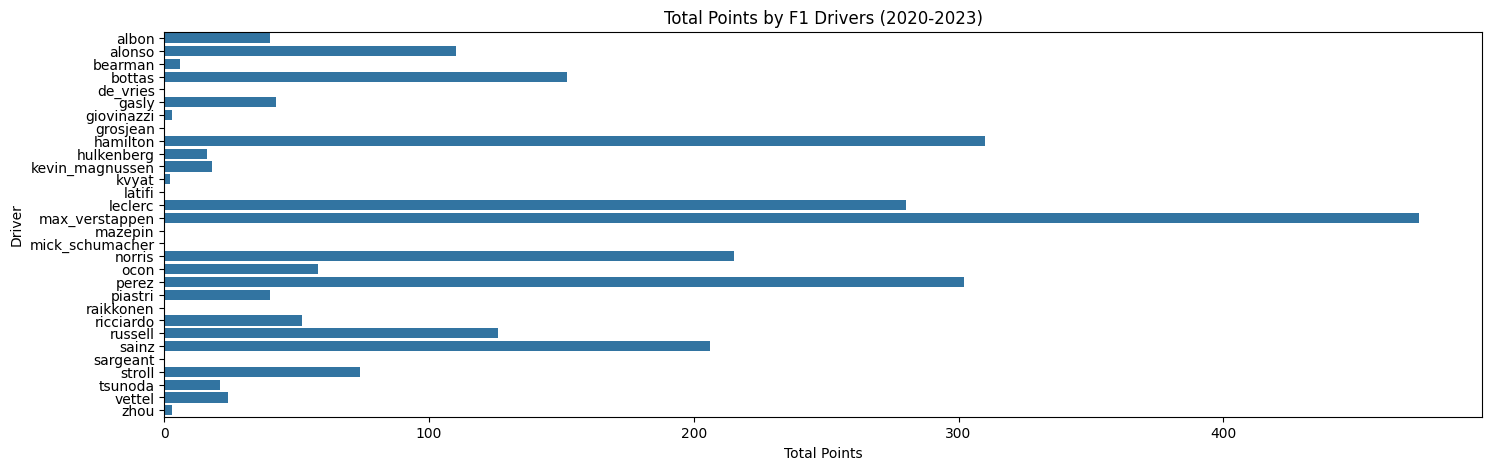

In [ ]:
# Count the fastest laps for each driver
fastest_laps = df[df['fastestLapRank'] == 1].groupby('driverId').size().reset_index(name='fastest_laps')

# Print the fastest laps DataFrame to verify its contents
print(fastest_laps)

# Merge with driver statistics and avoid column name conflicts
driver_stats = pd.merge(driver_stats, fastest_laps, on='driverId', how='left', suffixes=('', '_fastest'))

# Fill NaN values with 0 for drivers without fastest laps
driver_stats['fastest_laps'] = driver_stats['fastest_laps'].fillna(0)

# Check driver_stats DataFrame after merging
print(driver_stats.head())

# Visualization of Fastest Laps per Driver, only for those with recorded laps
filtered_stats = driver_stats[driver_stats['fastest_laps'] > 0]

# If filtered_stats is empty, visualize total points instead
if filtered_stats.empty:
    plt.figure(figsize=(17, 5))
    sns.barplot(x='total_points', y='driverId', data=driver_stats, dodge=False)
    plt.title('Total Points by F1 Drivers (2020-2023)')
    plt.xlabel('Total Points')
    plt.ylabel('Driver')
    plt.show()
else:
    plt.figure(figsize=(17, 5))
    sns.barplot(x='fastest_laps', y='driverId', data=filtered_stats, dodge=False)
    plt.axvline(x=0, color='grey', linestyle='--')  # Horizontal line at zero for reference
    plt.title('Fastest Laps by F1 Drivers (2020-2023)')
    plt.xlabel('Fastest Laps')
    plt.ylabel('Driver')
    plt.show()


# Data Display

**Ensuring Datetime Format:**
- Converted the `date` column to datetime format to ensure proper date handling.

**Extracting Year Information:**
- Extracted the year from the `date` column and created a new `year` column.

**Counting Unique Races per Year:**
- Counted the number of unique races per year using the `raceName` column.
- Created a DataFrame `race_count_per_year` to store this information.

**Displaying Data and Checking for Duplicates:**
- Displayed the first few rows of the DataFrame to confirm data presence.
- Checked the total number of unique races in the dataset and printed the result.
- Identified duplicate rows based on `raceName` and `date` and displayed them if any were found, otherwise confirmed no duplicates were found.

**Displaying Unique Seasons and DataFrame Info:**
- Displayed the unique values in the `season` column.
- Displayed DataFrame information, such as the number of rows and columns, and additional checks.


In [ ]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the date and create a new 'year' column
df['year'] = df['date'].dt.year

# Count the number of unique races per year using the 'raceName' column
race_count_per_year = df.groupby('year')['raceName'].nunique().reset_index(name='race_count')

# Display the first few rows of the DataFrame to confirm data presence
print(df.head())

# Check the total number of unique races in the dataset
total_races = df['raceName'].nunique()
print(f'Total unique races: {total_races}')

# Identify duplicate rows based on 'raceName' and 'date'
duplicates = df[df.duplicated(subset=['raceName', 'date'], keep=False)]
if not duplicates.empty:
    print(f'Duplicate races:\n{duplicates}')
else:
    print('No duplicate races found.')

# Display unique values in the 'season' column
print(f'Unique seasons: {df["season"].unique()}')

# Display DataFrame info and additional checks
print(df.info())  # Get information about the DataFrame, such as number of rows and columns



   driverId  position  points  fastestLapTime fastestLapRank  averageSpeed  \
0    bottas         1      25             NaN              2       229.758   
1   leclerc         2      18             NaN              4       228.933   
2    norris         3      16             NaN              1       230.378   
3  hamilton         4      12             NaN              3       229.572   
4     sainz         5      10             NaN              5       228.687   

   totalTimeMillis  totalTime season             raceName       date  \
0        5455739.0   5455.739   2020  Austrian Grand Prix 2020-07-05   
1        5458439.0        NaN   2020  Austrian Grand Prix 2020-07-05   
2        5461230.0        NaN   2020  Austrian Grand Prix 2020-07-05   
3        5461428.0        NaN   2020  Austrian Grand Prix 2020-07-05   
4        5464642.0        NaN   2020  Austrian Grand Prix 2020-07-05   

     circuitName  year  
0  Red Bull Ring  2020  
1  Red Bull Ring  2020  
2  Red Bull Ring  2020 

# Predicted Average Points per Driver (2024-2025)

**Importing Libraries:**
- Imported necessary packages for data manipulation, visualization, and machine learning: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, and `sklearn.linear_model`.

**Preparing the Data:**
- Ensured the `year` column is present in the DataFrame and properly formatted.

**Creating a Time Series:**
- Created a time series of average points per driver per year by grouping the DataFrame by `driverId` and `year`.

**Creating Linear Regression Models:**
- Created and fitted a linear regression model for each driver using `year` as the feature and `average points` as the target.
- Predicted average points for the years 2024 and 2025 for each driver.

**Appending Predictions:**
- Appended the predictions to a list and converted it to a DataFrame.

**Filtering Predictions:**
- Filtered the predictions to include only those with predicted points greater than or equal to zero.

**Visualizing Predictions:**
- Created a bar plot to visualize the predicted average points per driver for the years 2024 and 2025.
- Set plot size, titles, labels, and legend for better readability.


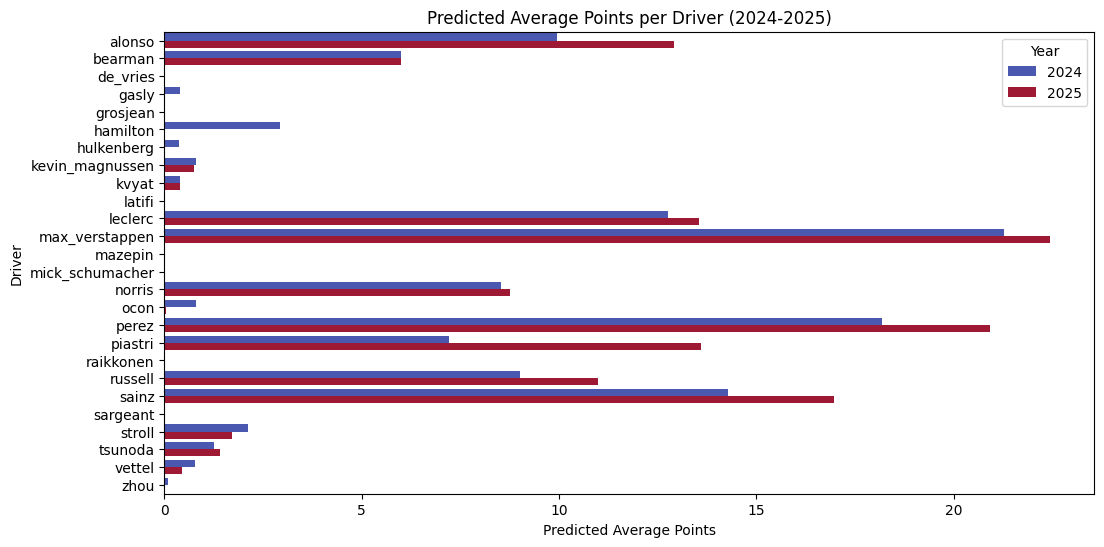

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the data
# Ensure 'year' is in the DataFrame and properly formatted
df['year'] = pd.to_datetime(df['date']).dt.year

# Step 2: Create a time series of average points per driver per year
average_points_per_year = df.groupby(['driverId', 'year'])['points'].mean().reset_index()

# Step 3: Create a Linear Regression model for each driver
predictions = []
unique_drivers = average_points_per_year['driverId'].unique()

for driver in unique_drivers:
    driver_data = average_points_per_year[average_points_per_year['driverId'] == driver]
    X = driver_data['year'].values.reshape(-1, 1)  # Feature: Year
    y = driver_data['points'].values  # Target: Average Points

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Step 4: Predict future years
    future_years = np.array([[2024], [2025]])
    predicted_points = model.predict(future_years)

    # Step 5: Append predictions
    for year, points in zip([2024, 2025], predicted_points):
        predictions.append({'driverId': driver, 'year': year, 'predicted_points': points})

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Step 6: Filter predictions to include only those with predicted points >= 0
filtered_predictions_df = predictions_df[predictions_df['predicted_points'] >= 0]

# Step 7: Visualize predictions
plt.figure(figsize=(12, 6))
sns.barplot(x='predicted_points', y='driverId', hue='year', data=filtered_predictions_df, palette='coolwarm')
plt.title('Predicted Average Points per Driver (2024-2025)')
plt.xlabel('Predicted Average Points')
plt.ylabel('Driver')
plt.legend(title='Year')
plt.show()


# Average Points Earned per Driver by Circuit

**Calculating Average Points per Driver by Circuit:**
- Grouped the DataFrame by `circuitName` and `driverId` to calculate the average points earned by each driver at each circuit.
- Created a new DataFrame `driver_circuit_performance` to store the results.

**Visualizing Average Points per Driver by Circuit:**
- Created a bar plot to visualize the average points earned by each driver at each circuit from 2020 to 2023.
- Set the plot size, titles, labels, and legend for better readability.


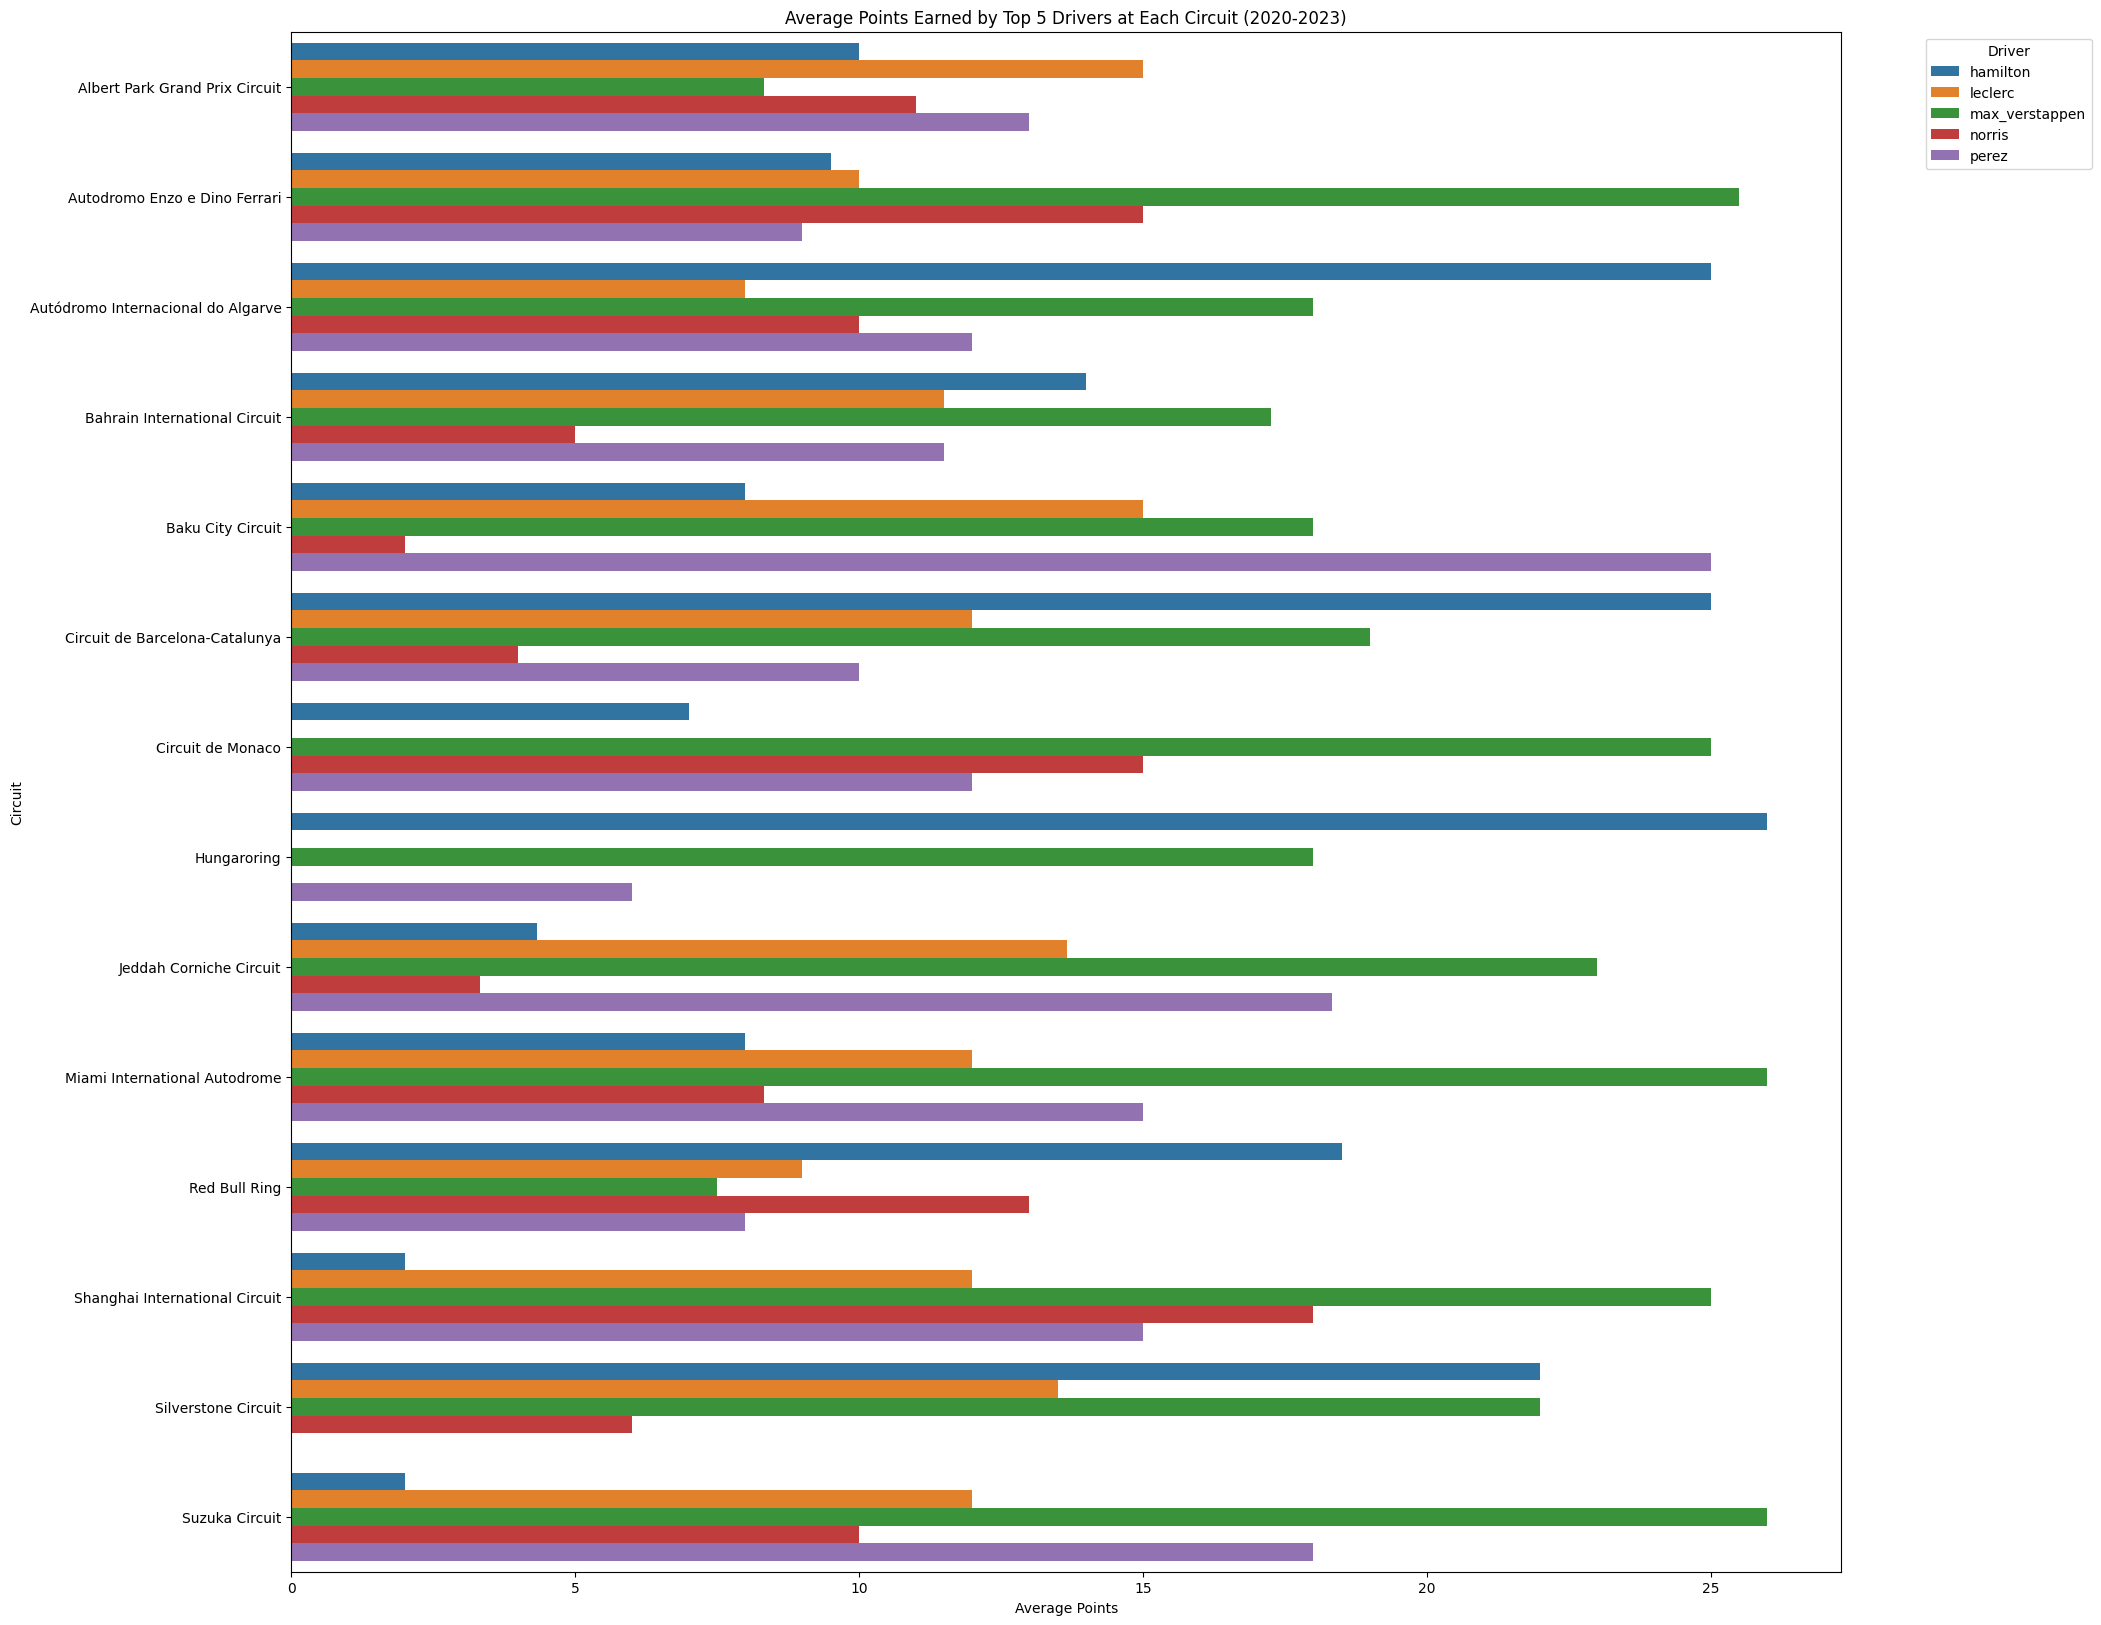

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the 'df' DataFrame is already defined and contains the relevant data

# Group by driverId to calculate total points for each driver
driver_points_total = df.groupby('driverId')['points'].sum().reset_index()

# Sort drivers by total points and select the top 10 drivers
top_5_drivers = driver_points_total.nlargest(5, 'points')['driverId']

# Filter the dataframe to include only the top 10 drivers
top_5_driver_data = df[df['driverId'].isin(top_5_drivers)]

# Calculate the average points earned per driver by circuit
driver_circuit_performance = top_5_driver_data.groupby(['circuitName', 'driverId'])['points'].mean().reset_index()

# Generate a distinct color palette for the top 10 drivers
unique_drivers = top_5_driver_data['driverId'].unique()
palette = sns.color_palette('tab10', len(unique_drivers))

# Plot the data
plt.figure(figsize=(20, 20))
sns.barplot(x='points', y='circuitName', hue='driverId', data=driver_circuit_performance, palette=palette)
plt.title('Average Points Earned by Top 5 Drivers at Each Circuit (2020-2023)')
plt.xlabel('Average Points')
plt.ylabel('Circuit')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


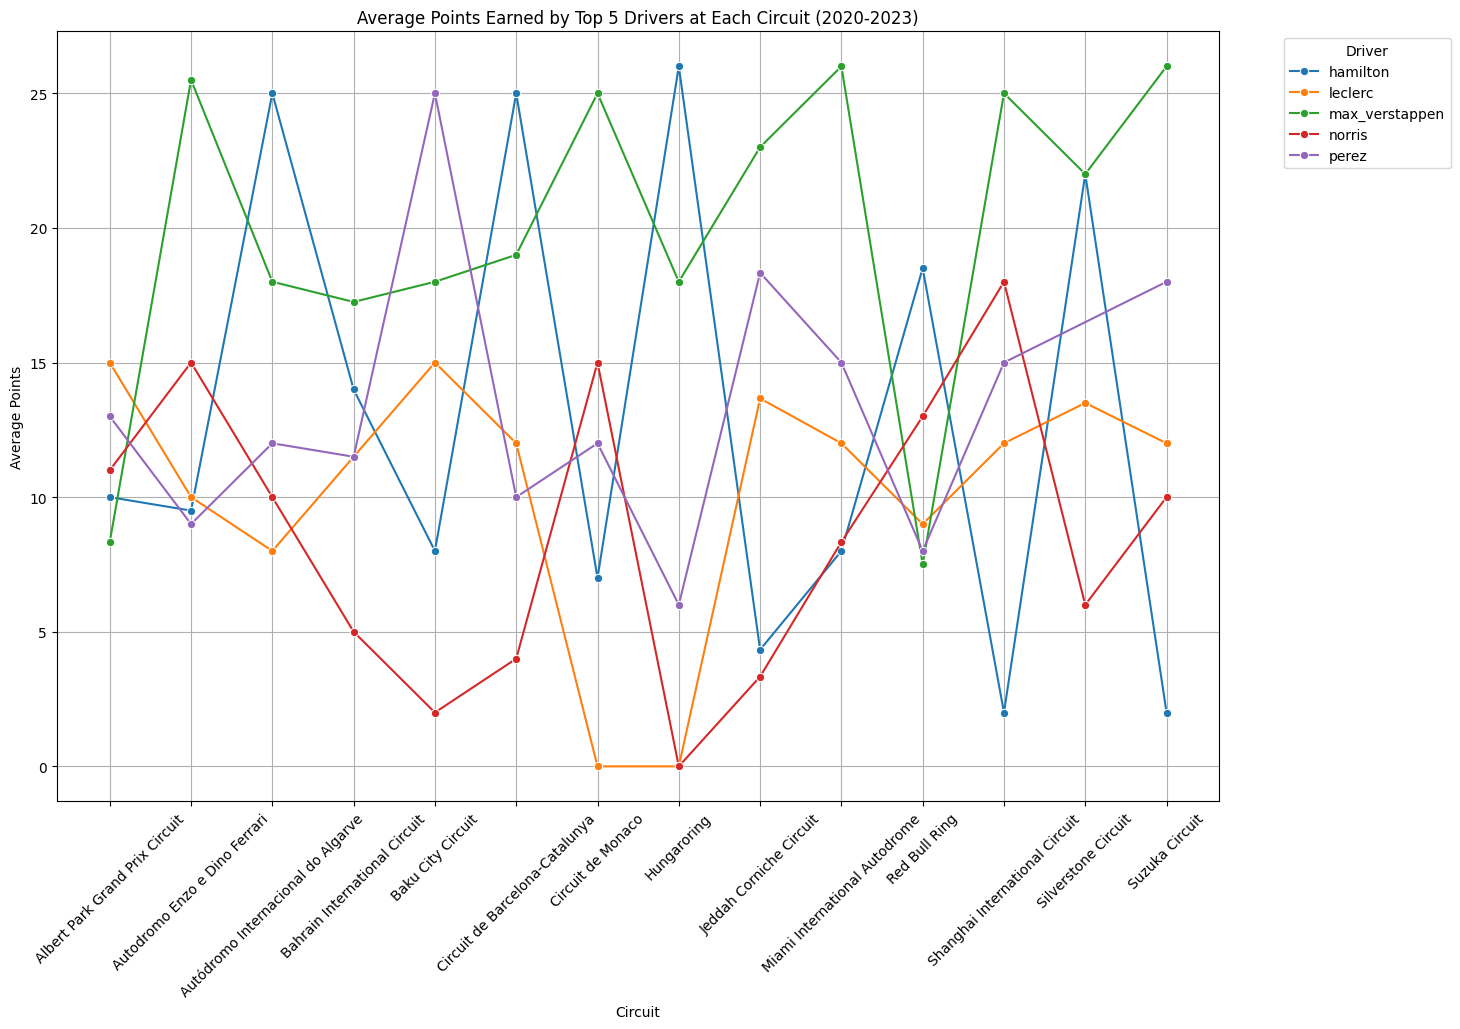

In [ ]:
# Plotting the data
plt.figure(figsize=(15, 10))
sns.lineplot(data=driver_circuit_performance, x='circuitName', y='points', hue='driverId', marker='o', palette='tab10')

plt.title('Average Points Earned by Top 5 Drivers at Each Circuit (2020-2023)')
plt.xlabel('Circuit')
plt.ylabel('Average Points')
plt.xticks(rotation=45)  # Rotate circuit names for better visibility
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Optional: add a grid for better readability
plt.show()

# Fetching Race Results and Identifying Top Drivers



**Fetching Race Results:**
- Created a function `fetch_race_results()` that fetches race results from the Ergast API for the years 2020 to 2023.
- Looped through rounds (1 to 22) and gathered race date, driver ID, and position for each result.

**Calculating Average Position for Each Driver:**
- Calculated the average position and total races for each driver using the fetched data.
- Created a DataFrame `driver_stats` to store this information.

**Identifying Top 10 Drivers:**
- Identified the top 10 drivers based on their average position.
- Sorted the results to ensure the correct order.

**Displaying Top Drivers:**
- Displayed the top drivers in a structured table format.

**Debug Information:**
- Provided additional debug information by displaying driver statistics sorted by average position.


In [ ]:
import pandas as pd
import requests

# Function to fetch race results from the Ergast API
def fetch_race_results():
    results = []
    for year in range(2020, 2024):
        for round in range(1, 23):  # Assume a maximum of 22 rounds per season
            url = f'http://ergast.com/api/f1/{year}/{round}/results.json'
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                races = data['MRData']['RaceTable']['Races']

                for race in races:
                    race_date = race['date']
                    for result in race['Results']:
                        results.append({
                            'race_date': race_date,
                            'driverId': result['Driver']['driverId'],  # Using driverId for consistency
                            'position': int(result['position'])
                        })
    return pd.DataFrame(results)

# Fetch race results
race_results = fetch_race_results()

# Check the fetched data
print("Sample of race results data:")
print(race_results.head())

# Calculate average position for each driver
driver_stats = race_results.groupby('driverId').agg(
    average_position=('position', 'mean'),
    total_races=('position', 'count')
).reset_index()

# Calculate top 10 drivers based on average position
top_drivers = driver_stats.nsmallest(10, 'average_position')

# Sort the top drivers by average position to ensure correct order
top_drivers = top_drivers.sort_values(by='average_position')

# Display the top drivers in a structured format
print("Top 10 Drivers to Consider for Future Teams (Projected Performance)")
print("\n| Rank | Driver ID        | Average Position    |")
print("|------|------------------|---------------------|")
for rank, row in enumerate(top_drivers.itertuples(), start=1):
    print("| {:<4} | {:<16} | {:<19} |".format(rank, row.driverId, row.average_position))

# Additional Debug Information
print("\nDriver statistics for debugging:")
print(driver_stats.sort_values(by='average_position').head(20))


Sample of race results data:
    race_date  driverId  position
0  2020-07-05    bottas         1
1  2020-07-05   leclerc         2
2  2020-07-05    norris         3
3  2020-07-05  hamilton         4
4  2020-07-05     sainz         5
Top 10 Drivers to Consider for Future Teams (Projected Performance)

| Rank | Driver ID        | Average Position    |
|------|------------------|---------------------|
| 1    | max_verstappen   | 3.819277108433735   |
| 2    | hamilton         | 4.560975609756097   |
| 3    | perez            | 6.481481481481482   |
| 4    | sainz            | 7.626506024096385   |
| 5    | leclerc          | 7.710843373493976   |
| 6    | norris           | 8.0                 |
| 7    | alonso           | 9.136363636363637   |
| 8    | bottas           | 9.927710843373495   |
| 9    | ricciardo        | 10.0                |
| 10   | russell          | 10.289156626506024  |

Driver statistics for debugging:
          driverId  average_position  total_races
16  max_versta

**Preparing Data for Radar Chart:**
- Extracted the `driverId` and `average_position` of the top drivers.
- Adjusted values for visualization by inverting the average positions (lower is better).

**Creating a Radar Chart:**
- Calculated angles for each axis based on the number of drivers.
- Prepared the data for the radar chart by concatenating the values to close the chart.

**Visualizing the Radar Chart:**
- Created a radar chart to visualize the performance of the top 10 drivers.
- Set the chart's aesthetics, including fill color and line width, and added labels and a title.


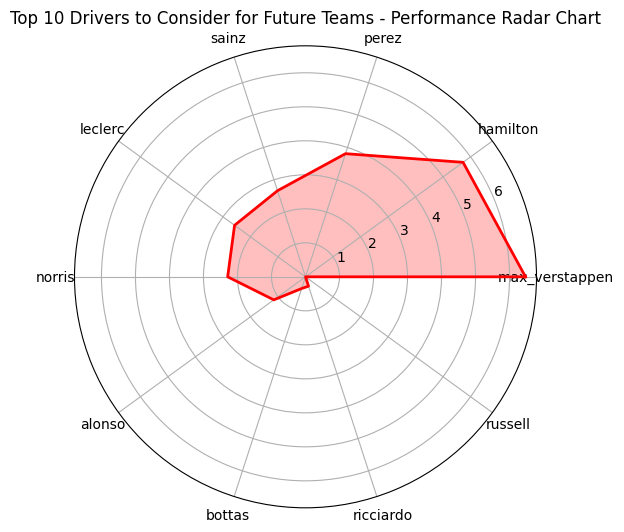

In [ ]:
from math import pi

# Prepare data for radar chart
labels = top_drivers['driverId']
values = top_drivers['average_position'].values
values = [max(values) - value for value in values]

# Radar Chart
num_vars = len(labels)

# Compute angle for each axis

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
values = np.concatenate((values,[values[0]]))
angles += angles[:1]

# Draw the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=2)

# Labels for each point
plt.xticks(angles[:-1], labels)

# Title
plt.title('Top 10 Drivers to Consider for Future Teams - Performance Radar Chart')
plt.show()

# Trend of Points Over Time for Top 10 Drivers

**Calculating Total Points for Each Driver:**
- Summed up the total points earned by each driver using the original DataFrame.

**Identifying Top 10 Drivers:**
- Selected the top 10 drivers based on total points using the `nlargest` method.

**Filtering Data for Top 10 Drivers:**
- Filtered the original DataFrame to include only the top 10 drivers and calculated their total points per season.

**Plotting Points Trend for Top 10 Drivers:**
- Created a line plot to visualize the trend of points earned by the top 10 drivers over the seasons from 2020 to 2023.
- Customized the plot with titles, labels, a legend, and a grid for better readability.


In [ ]:

# Step 1: Calculate total points for each driver
total_points_per_driver = df.groupby('driverId')['points'].sum().reset_index()

# Step 2: Identify the top 10 drivers based on total points
top_drivers = total_points_per_driver.nlargest(10, 'points')['driverId']

# Step 3: Filter the original data for only the top 10 drivers
points_trend_top_drivers = df[df['driverId'].isin(top_drivers)].groupby(['season', 'driverId'])['points'].sum().reset_index()

# Step 4: Plotting the trend for the top 10 drivers
plt.figure(figsize=(14, 6))
sns.lineplot(data=points_trend_top_drivers, x='season', y='points', hue='driverId', marker='o', palette='tab10', linewidth=2.5)

plt.title('Trend of Points Earned by Top 10 Drivers Over Seasons (2020-2023)', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




## Summary and Conclusions

From the analysis of Formula 1 race data from 2020 to 2023, an interesting picture emerged regarding driver performance. Specifically, the top-performing drivers identified in terms of points and fastest laps were:

1. **Max Verstappen** - Undoubtedly the best driver during the analyzed period, demonstrating consistency in performance that has secured him numerous points and victories.
2. **Lando Norris** - He has shown significant growth and firmly positioned himself among the top drivers, achieving excellent results.
3. **Charles Leclerc** - He has also maintained a prominent position, highlighting his talent and competitiveness.

Additionally, **Oscar Piastri** continues to develop his skills and achieve respectable results, while **Fernando Alonso** and **Sergio Pérez** has experienced a notable decline in performance, placing him much further behind his peers.

### Current Situation

With the start of the 2024 season, the results thus far confirm the predictions made. Max Verstappen continues to assert himself as the top driver on track, while Lando Norris and Charles Leclerc compete for second and third place in the points standings. Oscar Piastri, although progressing, still has some ground to cover to reach the top tier, whereas Sergio Pérez's situation appears to be in decline.

### Final Thoughts

The data collected and analyzed demonstrate the importance of consistency and performance in Formula 1 racing. While Verstappen continues to dominate, young talents like Norris and Piastri are emerging, promising to keep the competition among the top drivers alive. The 2024 season promises to be exciting, with the potential for further surprises and shifts in the standings.
